# Question 01

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sympy

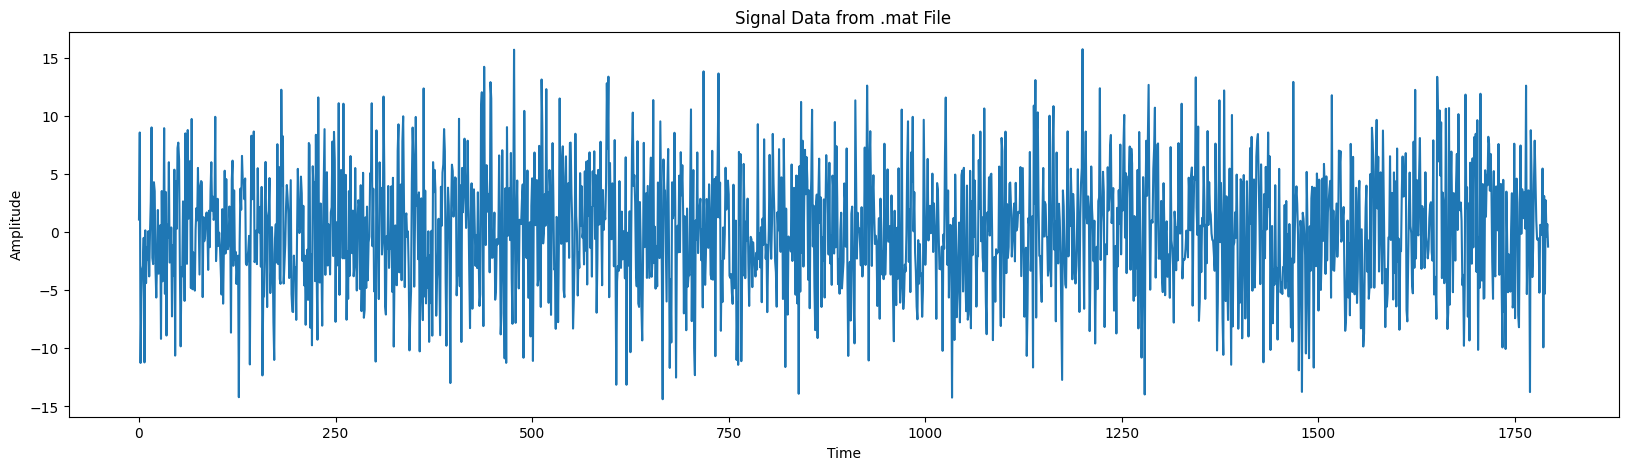

In [48]:
import scipy.io
import matplotlib.pyplot as plt

mat_data = scipy.io.loadmat('signals/signal686.mat')

# Access the variable from the loaded data
data = mat_data['xn_test']
data = np.squeeze(data) 


# print(mat_data.keys())


# Visualize the data as a plot
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Signal Data from .mat File')
plt.show()


In [49]:
# initialize constants
sample_frequency = 128
period = 14

In [50]:
# Constructing several subsets of the data

s_1 = data[0:129]
s_2 = data[0:257]
s_3 = data[0:513]
s_4 = data[0:1025]
s_5 = data[0:1793]


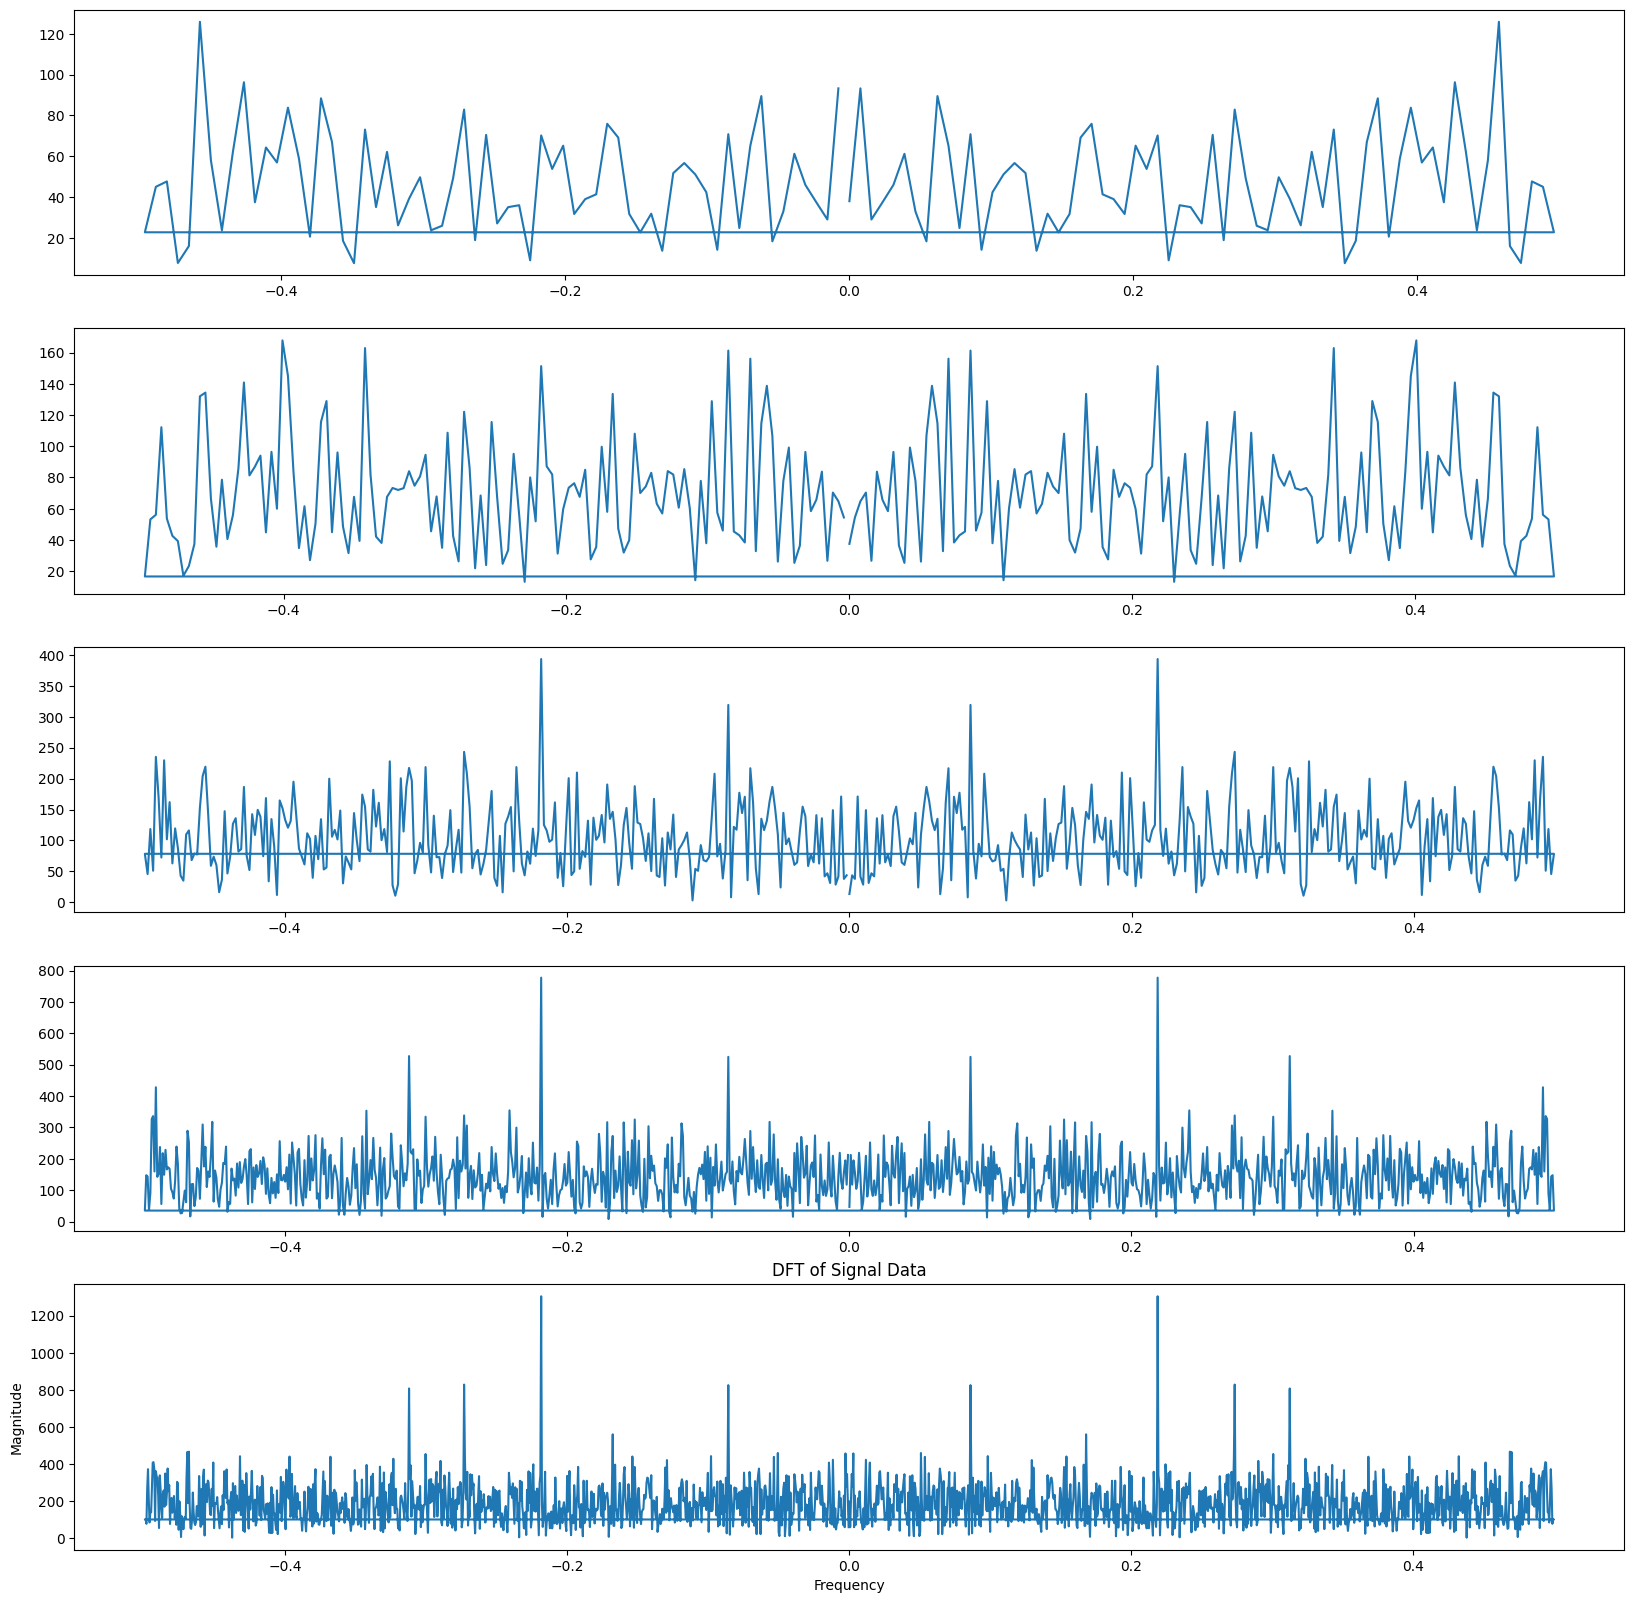

In [51]:
dft_result1 = np.fft.fft(s_1)
dft_result2 = np.fft.fft(s_2)
dft_result3 = np.fft.fft(s_3)
dft_result4 = np.fft.fft(s_4)
dft_result5 = np.fft.fft(s_5)

# Compute the frequency bins corresponding to the DFT
frequency_bins_1 = np.fft.fftfreq(len(s_1))
frequency_bins_2 = np.fft.fftfreq(len(s_2))
frequency_bins_3 = np.fft.fftfreq(len(s_3))
frequency_bins_4 = np.fft.fftfreq(len(s_4))
frequency_bins_5 = np.fft.fftfreq(len(s_5))

# Visualize the magnitude of the DFT result
fig,ax = plt.subplots(5,1,figsize=(20,20))
ax[0].plot(frequency_bins_1, np.abs(dft_result1))
ax[1].plot(frequency_bins_2, np.abs(dft_result2))
ax[2].plot(frequency_bins_3, np.abs(dft_result3))
ax[3].plot(frequency_bins_4, np.abs(dft_result4))
ax[4].plot(frequency_bins_5, np.abs(dft_result5))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT of Signal Data')
plt.show()


/home/vishagar/Documents/Apps/VS_CODE/EN 3551/EN_3551_Assignment_01/.venv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


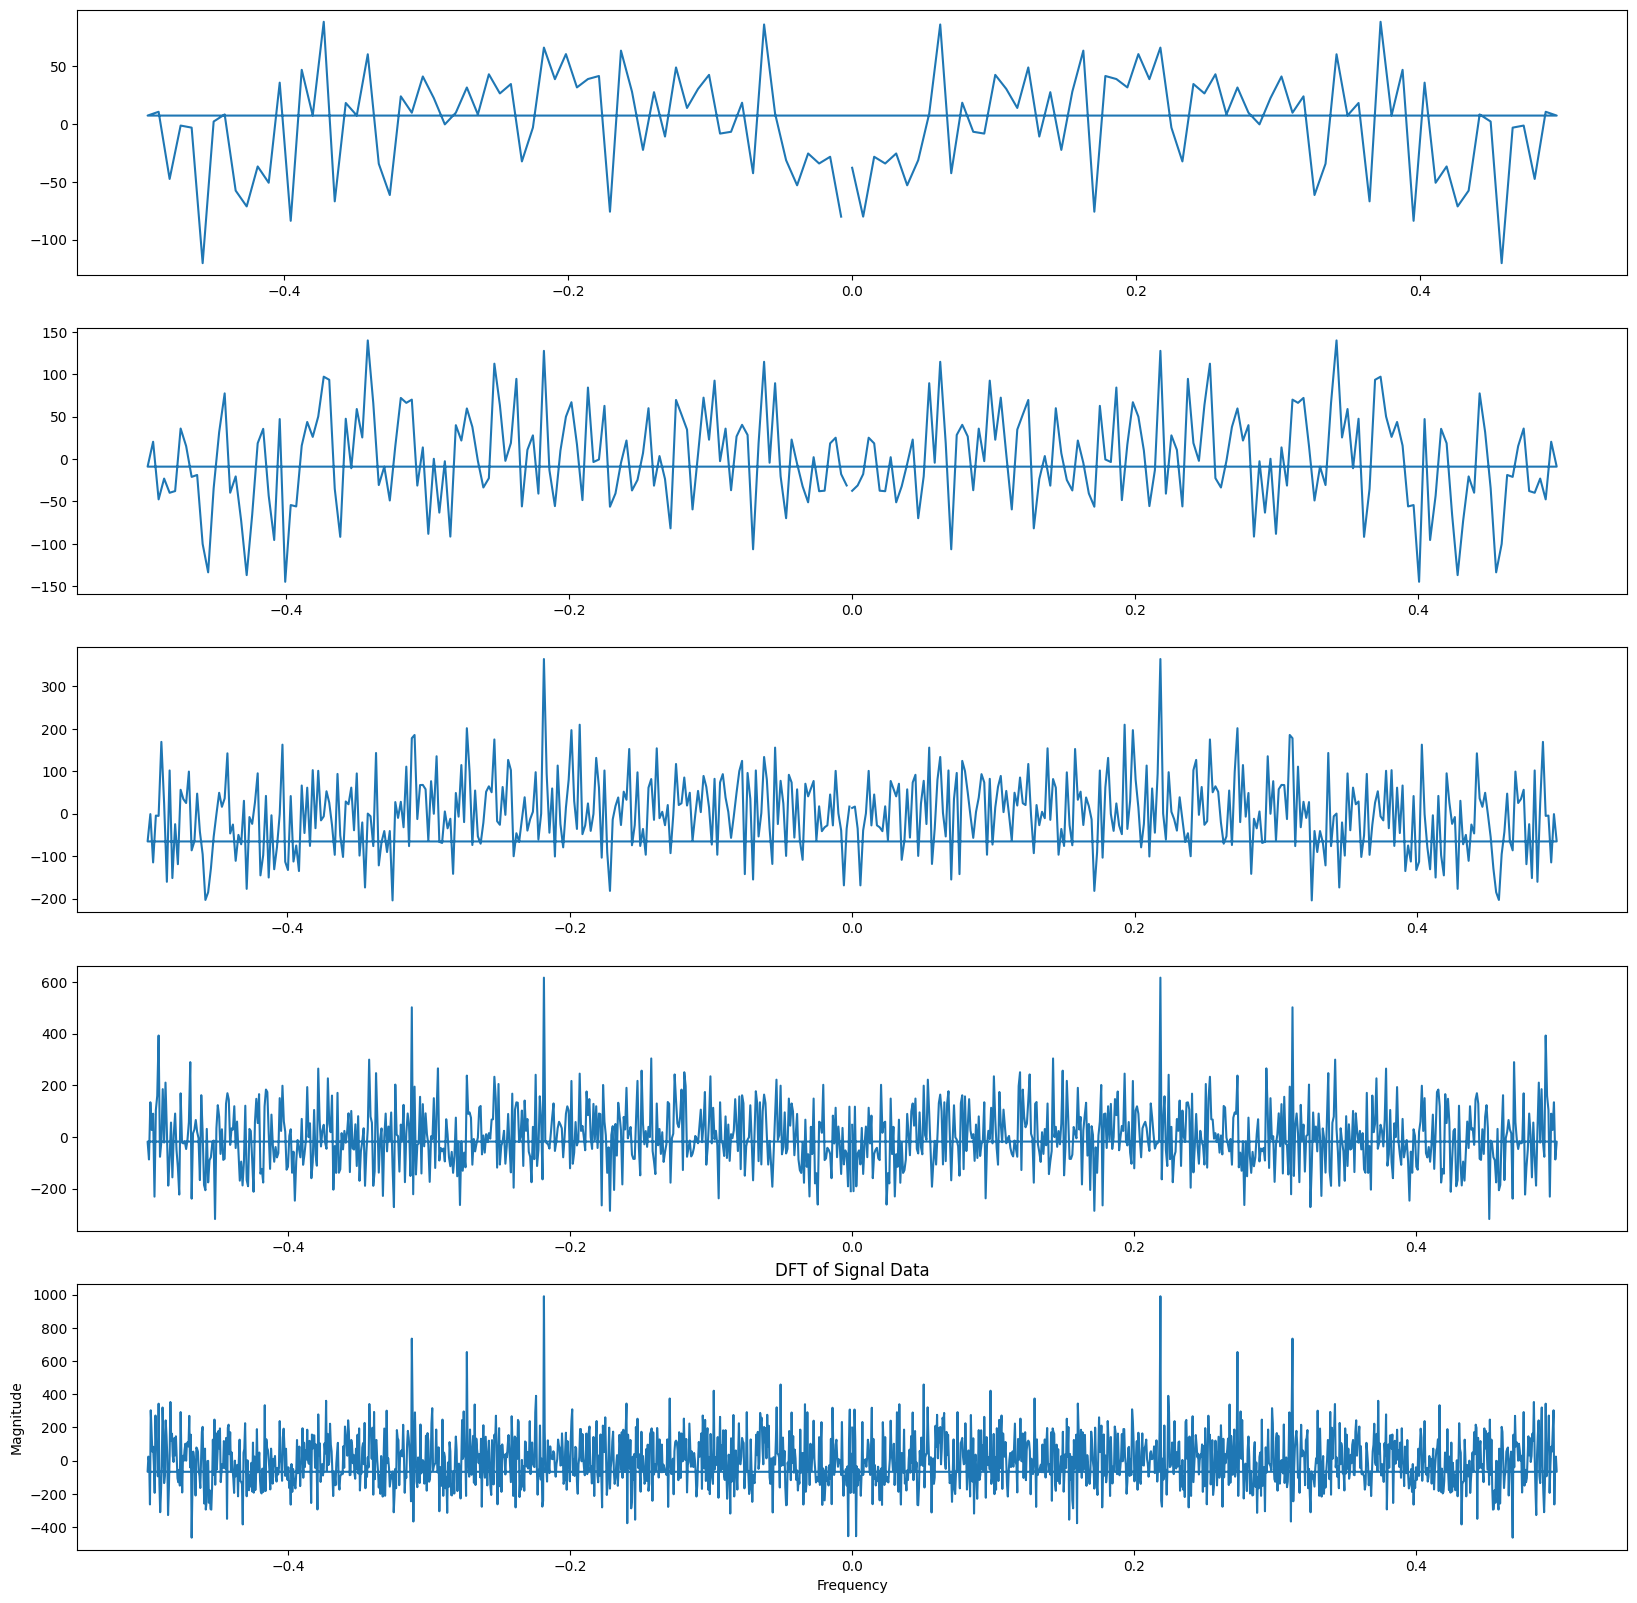

In [52]:
# Visualize the magnitude of the DFT result
fig,ax = plt.subplots(5,1,figsize=(20,20))
ax[0].plot(frequency_bins_1, dft_result1)
ax[1].plot(frequency_bins_2, dft_result2)
ax[2].plot(frequency_bins_3, dft_result3)
ax[3].plot(frequency_bins_4, dft_result4)
ax[4].plot(frequency_bins_5, dft_result5)

plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT of Signal Data')
plt.show()

(128,)
(128,)


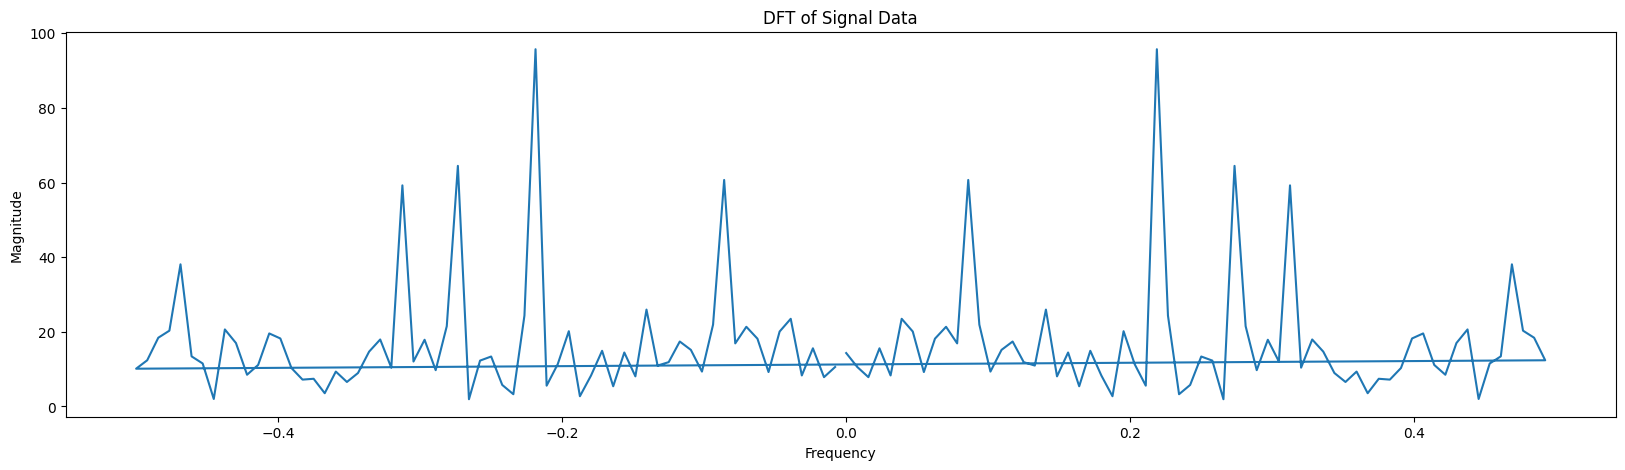

In [53]:
import numpy as np

# Create an example array of 1792 samples
original_array = data

# Define the sub-sample size
subsample_size = 128

# Calculate the number of sub-samples
num_subsamples = len(original_array) // subsample_size

# Split the original array into sub-samples
subsamples = [original_array[i * subsample_size:(i + 1) * subsample_size] for i in range(num_subsamples)]


# apply fft for each sub-sample

dft_result_sub_samples = np.fft.fft(subsamples)

# Compute the frequency bins corresponding to the DFT
frequency_bins_sub_samples = np.fft.fftfreq(len(subsamples[0]))

average_dft = np.mean(dft_result_sub_samples, axis=0)

print(average_dft.shape)
print(frequency_bins_sub_samples.shape)

# Visualize the magnitude of the DFT result
fig,ax = plt.subplots(figsize=(20,5))
ax.plot(frequency_bins_sub_samples, np.abs(average_dft))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT of Signal Data')
plt.show()

# Question 02

In [54]:
import matplotlib.pyplot as plt
import wave
import numpy as np

# Read the audio file
audio_file = wave.open('handel_audio.wav', 'r')

sample_frequency = audio_file.getframerate()
num_samples = audio_file.getnframes()
duration = num_samples / sample_frequency


audio_data = audio_file.readframes(num_samples)
audio_array = np.frombuffer(audio_data, dtype=np.int16)

N = 20000

y_n = audio_array[:N]


x_1 = y_n[1:N]
x_2 = y_n[1:N:2]
x_3 = y_n[1:N:3]
x_4 = y_n[1:N:4]
x_5 = y_n[1:N:1000]

print(x_1.shape)
print(x_2.shape)
print(x_3.shape)
print(x_4.shape)


# # Extract Raw Audio from Wav File
# signal = audio_file.readframes(-1)
# signal = np.frombuffer(signal, dtype='int16')
# sample_frequency = audio_file.getframerate()



(19999,)
(10000,)
(6667,)
(5000,)


In [71]:
interpolated_x_1 = np.zeros(len(x_2)*2)
for i in range(len(x_2)):
    interpolated_x_1[2*i] = x_2[i]

In [72]:
interpolated_x_2 = np.zeros(len(x_3)*3)
for i in range(len(x_3)):
    interpolated_x_2[3*i] = x_3[i]

In [73]:
interpolated_x_3 = np.zeros(len(x_4)*4)
for i in range(len(x_4)):
    interpolated_x_3[4*i] = x_4[i]

In [74]:
print(x_2[:10])
print(interpolated_x_1[:10])

[ -202 -1022  1248  -820 -2459 -4729 -6242  -417 -2459  2458]
[ -202.     0. -1022.     0.  1248.     0.  -820.     0. -2459.     0.]


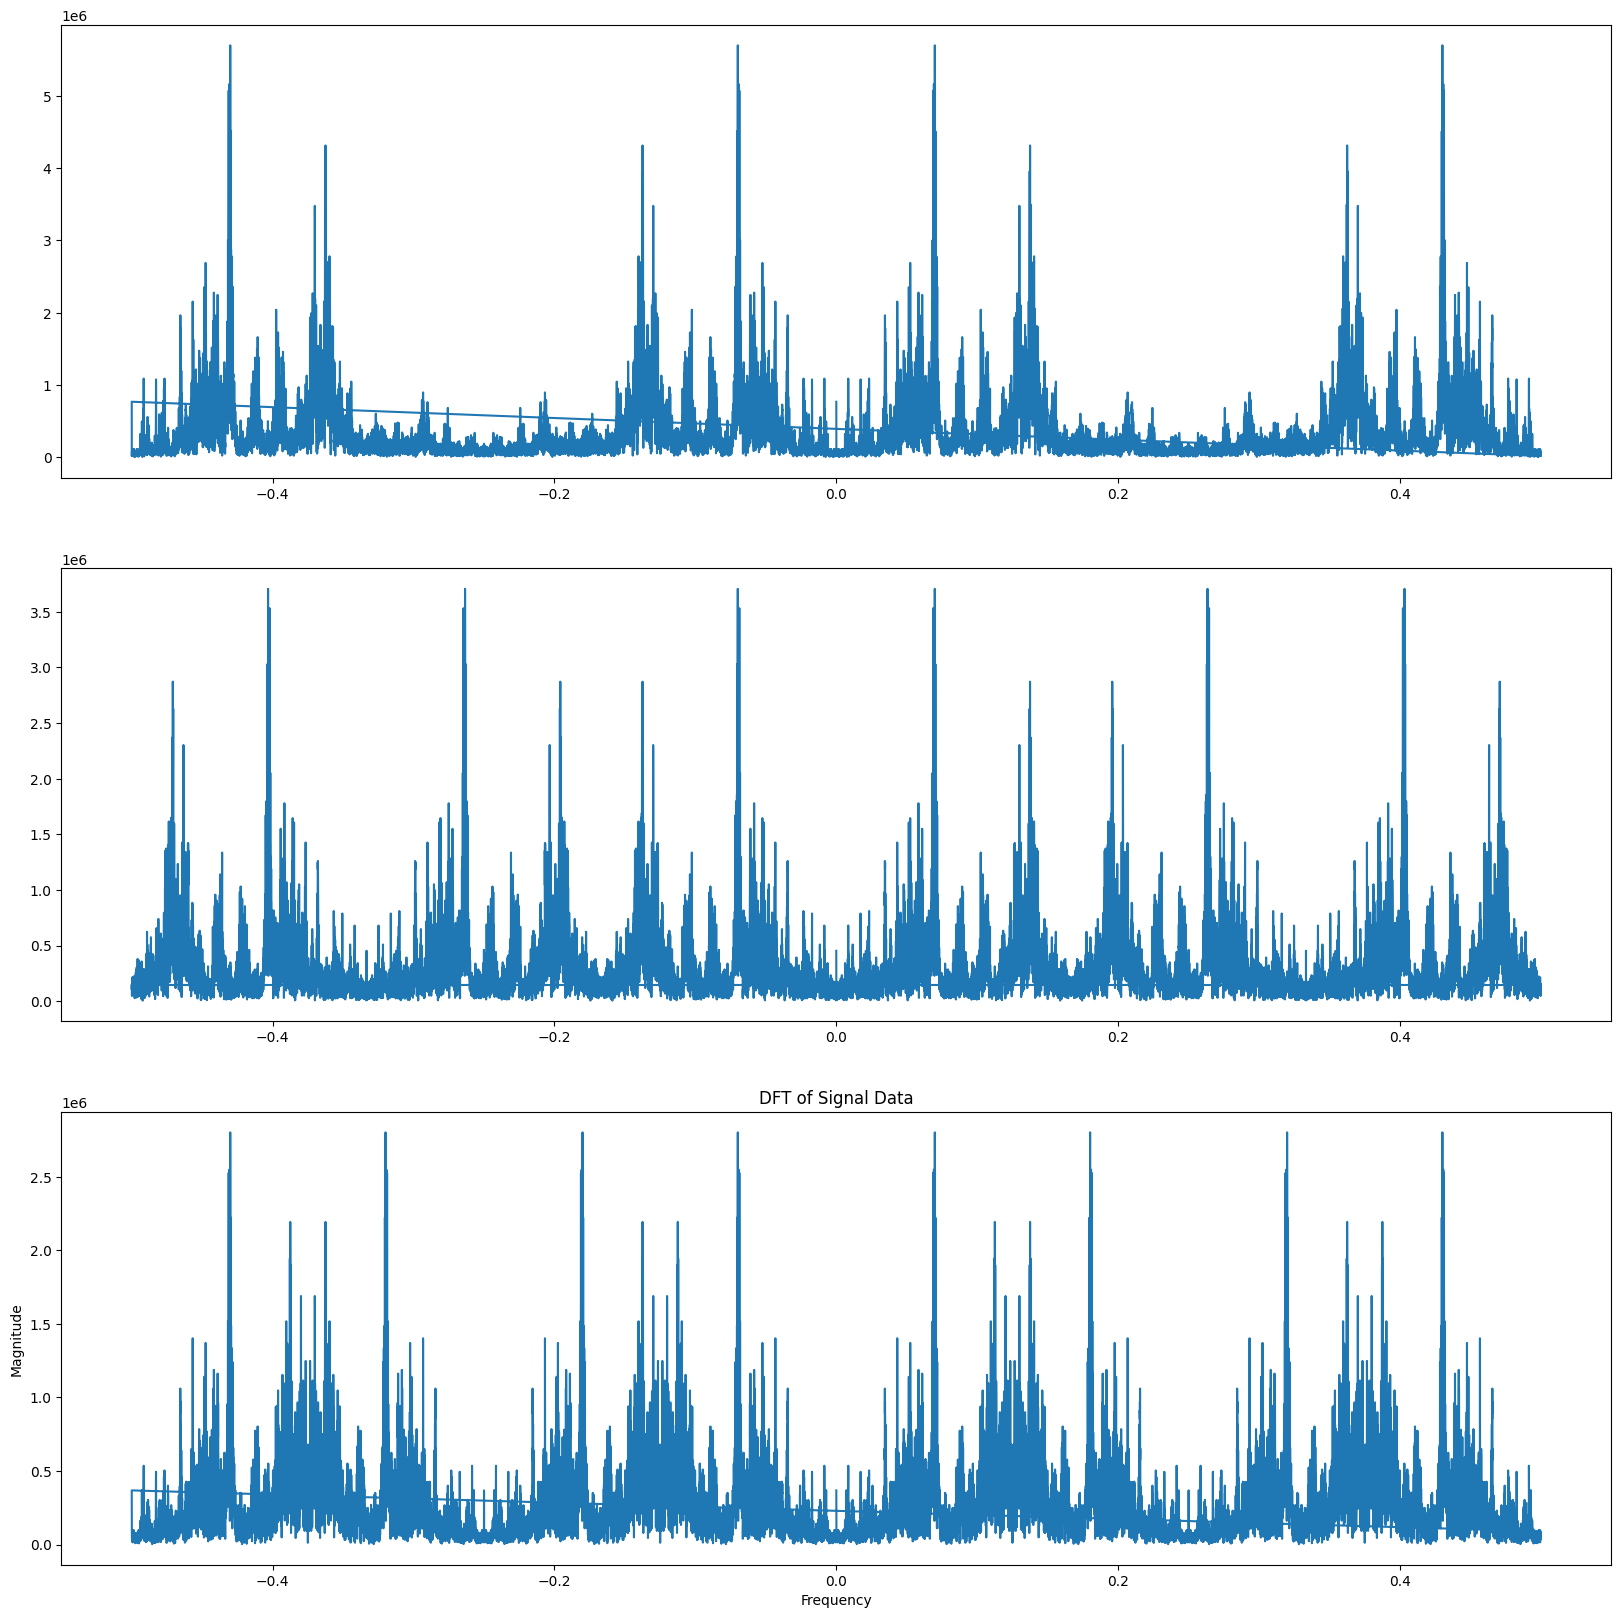

In [77]:
# Calcuclate DFT

dft_result1 = np.fft.fft(interpolated_x_1)
dft_result2 = np.fft.fft(interpolated_x_2)
dft_result3 = np.fft.fft(interpolated_x_3)

dft_Oresult_1 = np.fft.fft(x_2)
dft_Oresult_2 = np.fft.fft(x_3)
dft_Oresult_3 = np.fft.fft(x_4)

# Compute the frequency bins corresponding to the DFT
frequency_bins_1 = np.fft.fftfreq(len(interpolated_x_1))
frequency_bins_2 = np.fft.fftfreq(len(interpolated_x_2))
frequency_bins_3 = np.fft.fftfreq(len(interpolated_x_3))

frequency_Obins_1 = np.fft.fftfreq(len(x_2))
frequency_Obins_2 = np.fft.fftfreq(len(x_3))
frequency_Obins_3 = np.fft.fftfreq(len(x_4))


# Visualize the magnitude of the DFT result
fig,ax = plt.subplots(3,1,figsize=(20,20))
ax[0].plot(frequency_bins_1, np.abs(dft_result1))
ax[1].plot(frequency_bins_2, np.abs(dft_result2))
ax[2].plot(frequency_bins_3, np.abs(dft_result3))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('DFT of Signal Data')
plt.show()


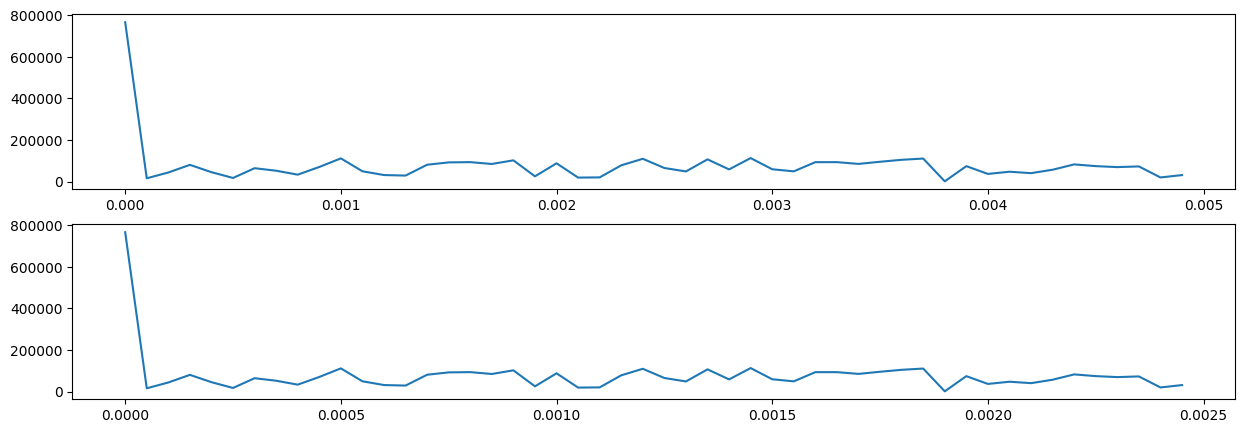

In [79]:
fig,ax = plt.subplots(2,1,figsize=(15,5))
ax[0].plot(frequency_Obins_1[:50], np.abs(dft_Oresult_1[:50]))
ax[1].plot(frequency_bins_1[:50], np.abs(dft_result1[:50]))
plt.show()

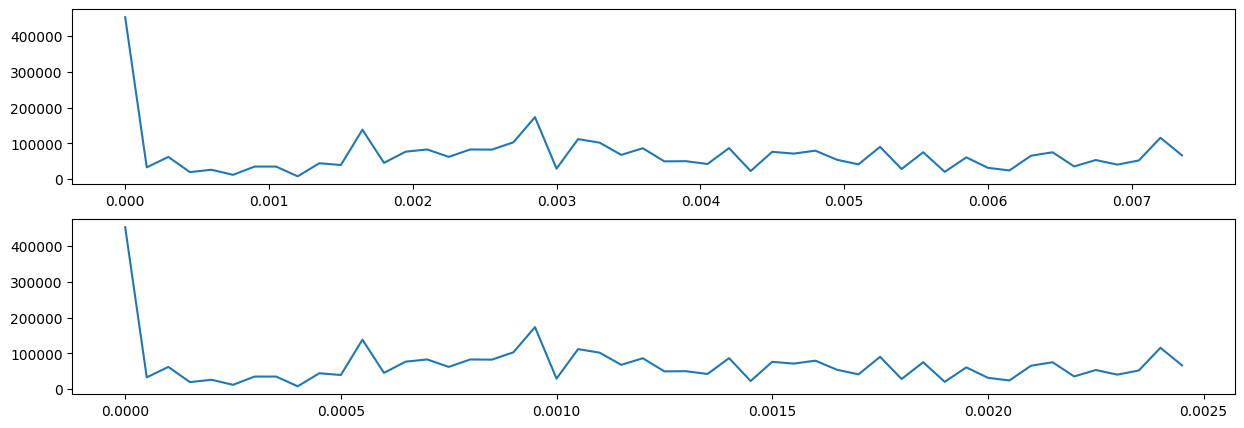

In [80]:
fig,ax = plt.subplots(2,1,figsize=(15,5))
ax[0].plot(frequency_Obins_2[:50], np.abs(dft_Oresult_2[:50]))
ax[1].plot(frequency_bins_2[:50], np.abs(dft_result2[:50]))
plt.show()

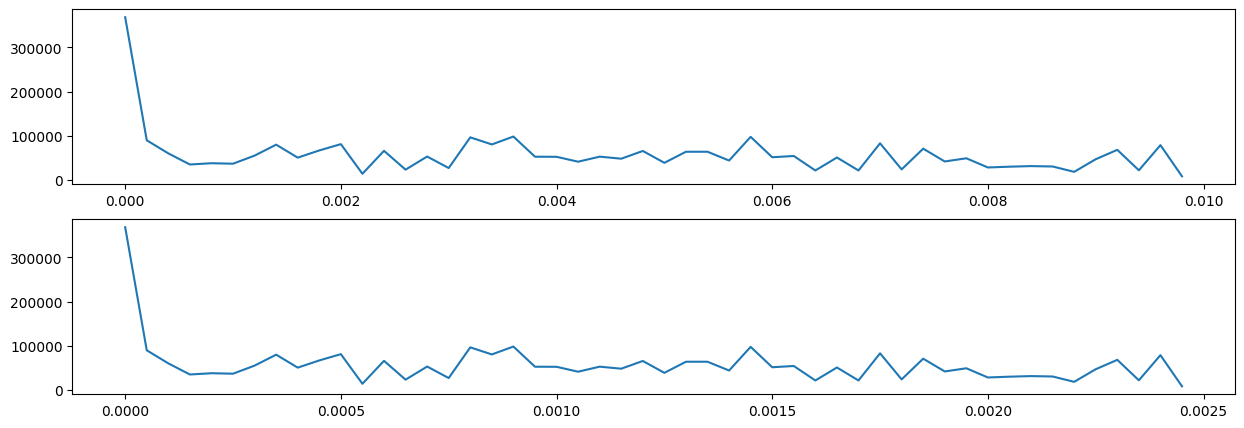

In [81]:
fig,ax = plt.subplots(2,1,figsize=(15,5))
ax[0].plot(frequency_Obins_3[:50], np.abs(dft_Oresult_3[:50]))
ax[1].plot(frequency_bins_3[:50], np.abs(dft_result3[:50]))
plt.show()